In [19]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import csv
import matplotlib.pyplot as plt

In [20]:
def process_posts(csv_file):
    posts = []
    labels = []

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file, delimiter=',')

        for row in reader:
            post = row['posts']
            post_type = row['type']

            posts.append(post)
            labels.append(post_type)

    return posts, labels

In [21]:
# am citit datele din fisierul cs
input_file = 'mbti_1.csv'
posts, labels = process_posts(input_file)


In [22]:
#doar am verificat numele coloanelor
with open('/content/mbti_1.csv', 'r') as file:
    lines = file.readlines()
    print(lines[0])

type,posts



In [23]:
#impartim setul de date
#din data setul nostru se vor folosi 80% pt training si 20% pt testare
train_posts, test_posts, train_labels, test_labels = train_test_split(posts, labels, test_size=0.2, random_state=42)

In [24]:
#am definit hiperparametri pt model
vocab_size = 10000
max_length = 100
embedding_dim = 50
lstm_units = 256
dense_units = 128
epochs = 20
batch_size = 64



In [25]:
#am codificat (tokenized) datele 

#am folosit oov pentru cuvintele pe care nu le inteleg/nu sunt in vocabular
tokenizer = keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_posts)
train_sequences = tokenizer.texts_to_sequences(train_posts)

#afisez codificarile
word_index = tokenizer.word_index
print(word_index)

#folosim padding ptca avem propozitii de lungimi diferite
train_padded = keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_length, truncating='post')

#creeaza o lista de integers( codificarea cuvintelor)
test_sequences = tokenizer.texts_to_sequences(test_posts)
test_padded = keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_length, truncating='post')

{'<OOV>': 1, 'i': 2, 'the': 3, 'to': 4, 'a': 5, 'and': 6, 'of': 7, 'you': 8, 'that': 9, 'it': 10, 'is': 11, 'in': 12, 'my': 13, 'but': 14, 'for': 15, 'have': 16, 'me': 17, 'with': 18, "i'm": 19, 'this': 20, 'be': 21, 'not': 22, 'are': 23, 'like': 24, 'on': 25, 'an': 26, 'as': 27, 'so': 28, 'was': 29, 'if': 30, 'just': 31, 'or': 32, 'do': 33, 'what': 34, 'about': 35, "don't": 36, 'think': 37, 'people': 38, 'your': 39, 'when': 40, "it's": 41, 'at': 42, 'all': 43, 'can': 44, 'know': 45, 'one': 46, 'they': 47, 'really': 48, 'more': 49, 'would': 50, 'we': 51, 'how': 52, 'out': 53, 'am': 54, 'because': 55, 'from': 56, 'get': 57, "i've": 58, 'some': 59, 'he': 60, 'time': 61, 'up': 62, 'very': 63, 'there': 64, 'no': 65, 'com': 66, 'them': 67, 'who': 68, 'feel': 69, 'well': 70, 'much': 71, 'being': 72, 'too': 73, 'been': 74, 'by': 75, 'love': 76, 'good': 77, 'say': 78, 'things': 79, 'other': 80, 'way': 81, 'want': 82, 'something': 83, 'most': 84, 'had': 85, 'see': 86, 'will': 87, 'only': 88, 'w

In [26]:
# Convert the labels to categorical format
#, the label encoder is used to encode the categorical labels (the personality types in this case) into numerical representations.
#The label encoder assigns a unique numerical label to each unique category in the labels.
# Convert the labels to categorical format


label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
num_classes = len(label_encoder.classes_)

In [27]:
# am creat modelul
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(lstm_units),
    keras.layers.Dense(dense_units, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [28]:
# compilam modelul
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# am antrenat modelul
history = model.fit(train_padded, train_labels_encoded, epochs=epochs, batch_size=batch_size, validation_data=(test_padded, test_labels_encoded))


Epoch 1/20
60/60 [==============================] - 39s 587ms/step - loss: 2.3567 - accuracy: 0.2038 - val_loss: 2.2452 - val_accuracy: 0.2142
Epoch 2/20
60/60 [==============================] - 35s 592ms/step - loss: 2.2903 - accuracy: 0.2127 - val_loss: 2.2345 - val_accuracy: 0.2309
Epoch 3/20
60/60 [==============================] - 34s 569ms/step - loss: 2.2262 - accuracy: 0.2226 - val_loss: 2.2735 - val_accuracy: 0.2069
Epoch 4/20
60/60 [==============================] - 33s 557ms/step - loss: 1.9959 - accuracy: 0.3196 - val_loss: 2.4055 - val_accuracy: 0.1954
Epoch 5/20
60/60 [==============================] - 34s 563ms/step - loss: 1.6619 - accuracy: 0.4369 - val_loss: 2.7149 - val_accuracy: 0.1620
Epoch 6/20
60/60 [==============================] - 36s 599ms/step - loss: 1.3776 - accuracy: 0.5372 - val_loss: 2.8749 - val_accuracy: 0.1651
Epoch 7/20
60/60 [==============================] - 34s 562ms/step - loss: 1.1205 - accuracy: 0.6334 - val_loss: 3.3449 - val_accuracy: 0.1505

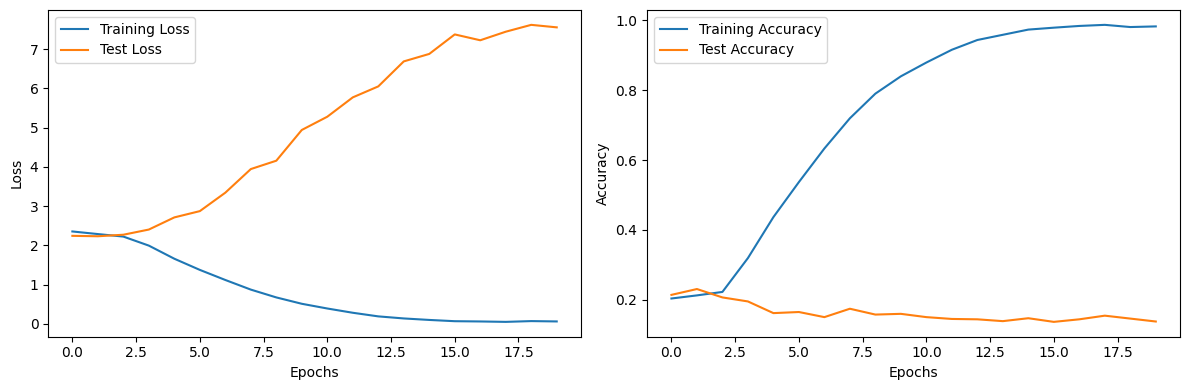

In [30]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history(history)

In [31]:
# studiem metricele de evaluare
test_loss, test_accuracy = model.evaluate(test_padded, test_labels_encoded, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

train_loss, train_accuracy = model.evaluate(train_padded, train_labels_encoded, verbose=0)
print('Training Loss:', train_loss)
print('Training Accuracy:', train_accuracy)

Test Loss: 7.556963920593262
Test Accuracy: 0.13793103396892548
Training Loss: 0.037225641310214996
Training Accuracy: 0.9911157488822937


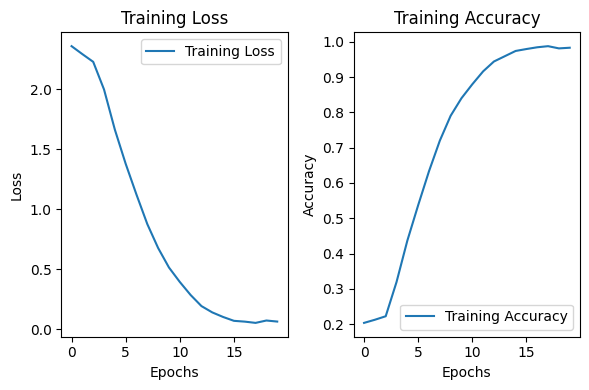

Test Loss: 7.556963920593262
Test Accuracy: 0.13793103396892548


In [32]:

test_loss, test_accuracy = model.evaluate(test_padded, test_labels_encoded, verbose=0)


plt.figure(figsize=(6, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

In [38]:

# predictii
new_posts = ["http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by...|||All things in moderation.  Sims is indeed a video game, and a good one at that. Note: a good one at that is somewhat subjective in that I am not completely promoting the death of any given Sim...|||Dear " ,"'I got 593.  From what I've read about the Enneagram I'm a 953, though.  I read somewhere that a lot of 9's mistype themselves as 5's.|||GTFO FEELER!|||A lot of the stuff that you read in the INTP descriptions applies to ISTPs a well.  Like you mentioned we share a dominant function. Honestly, I think that even some of the things those descriptions...|||Don't worry about it.  You are trying to make sense of the world and it's hard to ask this kind of question without being offensive.  Luckily, ISTPs don't usually get offended too easily.  I've...|||My mother-in-law is an ESTJ.  She is the epitome of an upstanding citizen.  She volunteers at her church.  She is eager to to any kind of manual labor to help someone out.  She is a teacher in one of...|||I'd rather buy my own cheap lawn mower to walk behind 40 minutes a week than have to drive to a rental shop and load up a nice mower every time I wanted to mow my yard.  It pisses me off enough to...|||I can't think of any great ones.   It may be better to post this question in the cognitive functions forum. They've been helpful for me when I had these kinds of questions. I'd be interested in...|||I have a Facebook account but I don't use it.   I do like twitter. I never tweet but it is interesting to see what people are saying about the snl episode or basketball game that I am watching in...|||I experience almost everything mentioned in this 6 page thread but this sticks out to me.  I will analyze something to the point that I can't remember all of the reasons that support my argument. ...|||http://i.imgur.com/qd2Eb.gif|||Interesting.  If Clay Aiken tested as an ISTP that is further evidence that the tests don't mean a lot.   I think Aiken is an ENFJ.  He uses Fe a lot and has an in charge interaction style.  He...|||Really rare for me too.  I can't even remember a time I've said it to my parents, although I think I have.|||I like ISFJ females. I've been lucky enough to be around a few that aren't overtly emotional. My wife is one and her mom is an ESTJ tyrant. That made her a lot mare logical than I think she would...|||Crap ... now I have to go slower. :laug", "I believed in God all my life up until about a year ago. My mother was a very strong believer in God and encouraged me and my brothers to be the same way. She didn't force it down our throats or...|||I lurk everywhere to be honest.|||I had a bunny. Named Lola. After the Loony Toon. She shitted on me once.|||I'm only 18, really.|||Frequently.|||I'm really a 54 year old man.|||I was thinking this.  Anyway, my brother and a close friend of mine are ENFPs. Both are the shit. And I could definitely see myself with an ENFP girl.|||Not really my kinda thing.|||I fap with my left hand, if that counts as being ambidextrous.|||"]



new_sequences = tokenizer.texts_to_sequences(new_posts)
new_padded = keras.preprocessing.sequence.pad_sequences(new_sequences, maxlen=max_length, truncating='post')
predictions = model.predict(new_padded)
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))


for post, label in zip(new_posts, predicted_labels):
    print('Post:', post)
    print('Predicted Label:', label)
    print('---')

1/1 [==============================] - 0s 53ms/step
Post: http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.